In [11]:
!python3 -m pip install graphviz  # specifically Python 3.4

  Using cached https://files.pythonhosted.org/packages/86/86/89ba50ba65928001d3161f23bfa03945ed18ea13a1d1d44a772ff1fa4e7a/graphviz-0.16-py2.py3-none-any.whl


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [3]:
# le random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
# le bruit ajouté 
y[::5] += 3 * (0.5 - rng.rand(16))

### Création des differents arbres de profondeur 2,3,4,6
### Pour chacun des arbres :
    On crée l'objet scikit-learn permettant d'effectuer la régression par un arbre de décision
    On optimise l'arbre sur nos données
    On prédit l'arbre sur des données simulés

In [4]:

# Fit regression model
regressors = []
depths = [2, 3, 4, 6]
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
Y_test = []
for p in depths:
    reg = DecisionTreeRegressor(max_depth=p)  # Création d'un arbre de régression de profondeur p
    reg.fit(X, y)  # Processus d'optimisation de l'arbre
    Y_test.append(reg.predict(X_test))  # On prédit sur les données et on ajoute à la liste des valeurs prédites
    regressors.append(reg)


Modelisation des categories rendu par l'arbre (selon la profondeur)

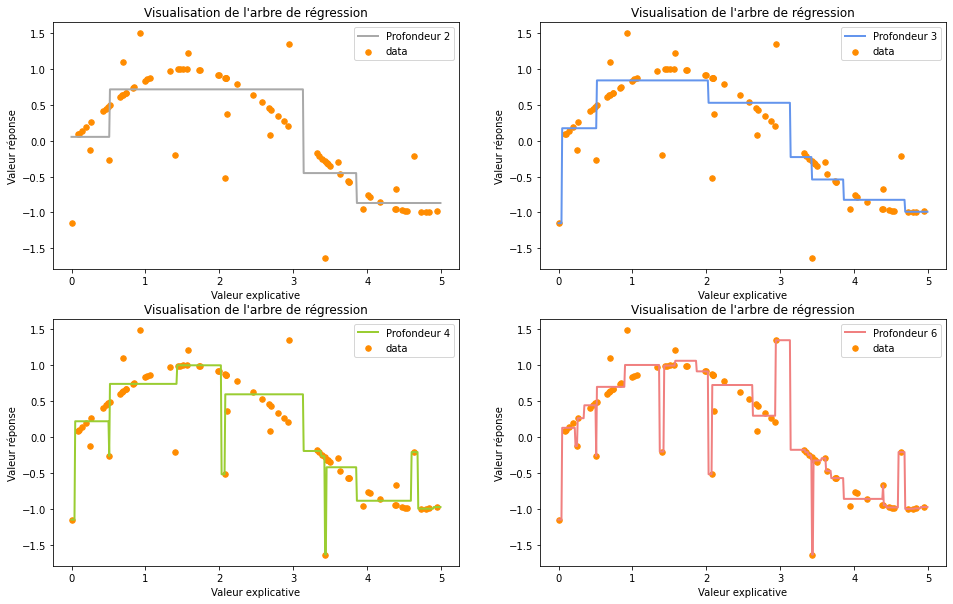

In [5]:
plt.figure(figsize=(16, 10))
colors = [ "darkgray", "cornflowerblue", "yellowgreen", "lightcoral"]

for i, reg in zip(range(len(regressors)), regressors):
    plt.subplot(220 + i + 1)
    plt.plot(X_test, Y_test[i], color=colors[i], label="Profondeur {0}".format(depths[i]), linewidth=2)
    plt.scatter(X, y, s=30, c="darkorange", label="data")
    plt.xlabel("Valeur explicative")
    plt.ylabel("Valeur réponse")
    plt.title("Visualisation de l'arbre de régression")
    plt.legend()
    
plt.show()


### Ce quon voit : 
    profondeur 2 : manques de précision
    profondeur 3 : plus precis que profondeur 2
    profondeur 4 : prend en compte des données "indépandantes"
    profondeur 6 : prend en compte encore plus de données "indépandantes"

In [14]:
import graphviz 
dot_data = tree.export_graphviz(regressors[0], out_file=None) 
graph = graphviz.Source(dot_data) 
graph

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

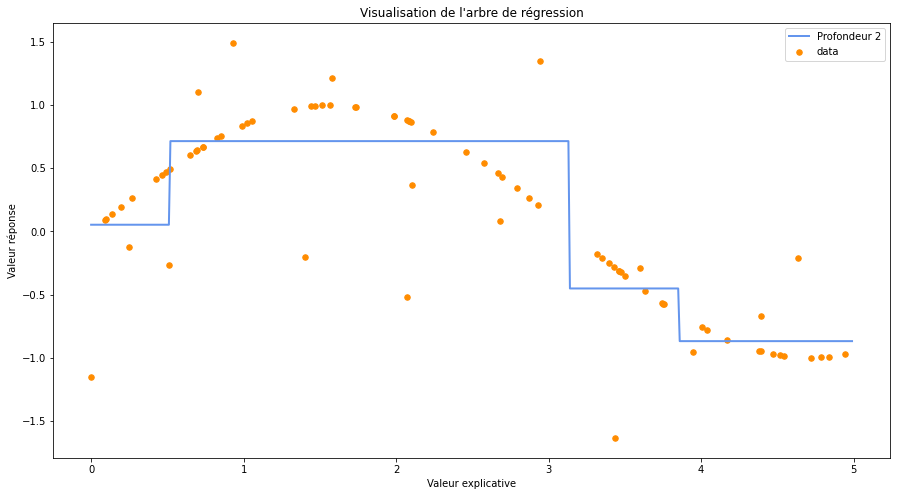

In [13]:
plt.figure(figsize=(15, 8))
plt.plot(X_test, Y_test[0], color="cornflowerblue", label="Profondeur 2", linewidth=2)
plt.scatter(X, y, s=30, c="darkorange", label="data")
plt.xlabel("Valeur explicative")
plt.ylabel("Valeur réponse")
plt.title("Visualisation de l'arbre de régression")
plt.legend()
    
plt.show()